## import statements

In [1]:
import altair as alt
import pandas as pd

In [3]:
trem_list = pd.read_pickle('../data/tremor/aghosh.pkl')

In [4]:
type(trem_list)

list

In [5]:
tremors = trem_list[0]

In [6]:
tremors.head()

,Year,Month,Day,Hour,Minute,Latitude,Longitude,Depth,errLat,errLon,errDepth
0,2009,6,20,1,26,48.232500,-123.065000,28.000000,10.423439,7.125217,17.262677
1,2009,6,20,1,28,48.172500,-123.050000,23.750000,2.451065,1.355398,3.774917
2,2009,6,20,9,20,48.453333,-123.066667,55.000000,9.907575,2.795187,7.000000
3,2009,6,20,21,3,48.403333,-123.726667,53.333333,8.934842,11.118311,31.659648
4,2009,6,21,0,42,48.030000,-122.875000,21.000000,4.328503,7.153370,12.909944


In [7]:
tremors.shape

(28902, 11)

In [8]:
tremors.Year.unique()

array([2009, 2010], dtype=int64)

In [9]:
aug16 = tremors[(tremors['Year']==2010)&(tremors['Month']==8)&(tremors['Day']==17)]

In [10]:
aug16.shape

(1321, 11)

In [11]:
aug16.head()

,Year,Month,Day,Hour,Minute,Latitude,Longitude,Depth,errLat,errLon,errDepth
18239,2010,8,17,0,1,48.0575,-122.990000,42.500000,1.390931,0.607511,3.872983
18240,2010,8,17,0,2,47.9600,-123.017500,23.750000,1.276406,1.411121,5.795113
18241,2010,8,17,0,4,47.8600,-122.827500,66.500000,3.721331,7.016445,13.403980
18242,2010,8,17,0,5,47.9000,-122.806667,62.333333,8.731960,7.322551,5.537749
18243,2010,8,17,0,7,47.7850,-123.062500,59.000000,4.557681,5.086782,26.758176


### Converting columns to pandas datetime series

In [24]:
datetime = pd.to_datetime(aug16.iloc[:,0:5])
datetime[0:3]

18239   2010-08-17 00:01:00
18240   2010-08-17 00:02:00
18241   2010-08-17 00:04:00
dtype: datetime64[ns]

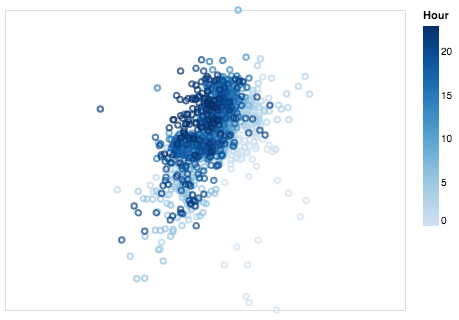

In [37]:
alt.Chart(aug16).mark_point().encode(
    longitude = 'Longitude',
    latitude = 'Latitude',
    color='Hour'
)

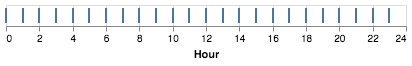

In [38]:
alt.Chart(aug16).mark_tick().encode(
    x='Hour'
)

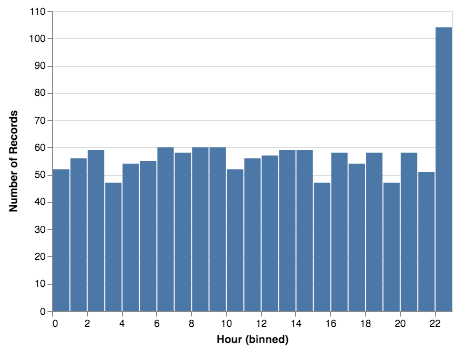

In [47]:
brush = alt.selection(type='interval', encodings=['x'])
alt.Chart(aug16).mark_bar().encode(
    x= alt.X("Hour", bin=alt.Bin(maxbins=24, minstep=1)),
    y='count()'
).properties(
    selection=brush
)

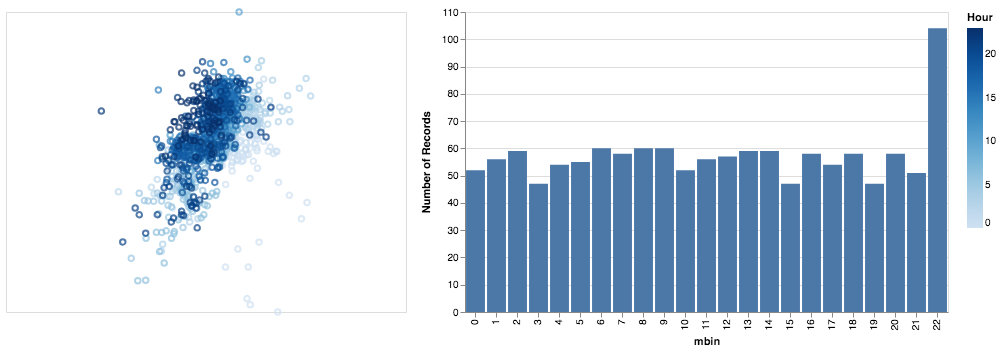

In [53]:
brush = alt.selection(type='interval', encodings=['x'])

points = alt.Chart().mark_point().encode(
    longitude = 'Longitude',
    latitude = 'Latitude',
    color='Hour'
).transform_filter(
    brush.ref()
)

bars = alt.Chart().mark_bar().encode(
    x= 'mbin:N',
    y='count()'
).properties(
    selection=brush
)

alt.hconcat(points, bars,
    data=aug16
).transform_bin(
    "mbin",
    field="Hour",
    bin=alt.Bin(maxbins=25)
)